# РТ5-61Б, Забурунов Л. В.

# Технологии Машинного Обучения

# Рубежный Контроль №2

## "Методы построения моделей машинного обучения"

Воспользуемся набором данных №5 (по варианту на семестр) из числа предложенных в задании. В соответствии с академической группой модели для обучения - дерево решений и градиентный бустинг.

### 1. Загрузка данных

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

rk2_data = pd.read_csv("ML_Datasets/RK2/heart.csv")

In [28]:
print(rk2_data.shape, rk2_data.info(), sep = "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
(303, 14)

None


Пропуски в данных отсутствуют.

In [29]:
for column in rk2_data.columns:
    print(column, ": ", rk2_data[column].unique())

age :  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex :  [1 0]
cp :  [3 2 1 0]
trestbps :  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol :  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


Требуется кодирование категориальных признаков и масштабирование данных

In [34]:
rk2_data = pd.get_dummies(rk2_data, columns = ["restecg", "slope", "ca", "thal"])

In [36]:
def MoveColumnToEnd(data, column_name):
    columns = data.columns.tolist()
    column = columns.pop(columns.index(column_name))
    columns.append(column)
    return columns

In [37]:
columns = MoveColumnToEnd(rk2_data, "target")
rk2_data = rk2_data[columns]

In [45]:
import matplotlib.pyplot as plt


def ShowColumnsDistribution(data):
    columns = data.columns.to_list()
    fig, ax = plt.subplots(len(columns), 1, figsize=(20, 5 * len(columns)))
    for i in range(len(columns)):
        sns.histplot(data[columns[i]], ax=ax[i], kde = True)

In [46]:
from sklearn.preprocessing import MinMaxScaler


zScaler = MinMaxScaler()
columns = rk2_data.columns.to_list()

In [47]:
for column in columns[:-1]:
    rk2_data[column] = zScaler.fit_transform(rk2_data[[column]])

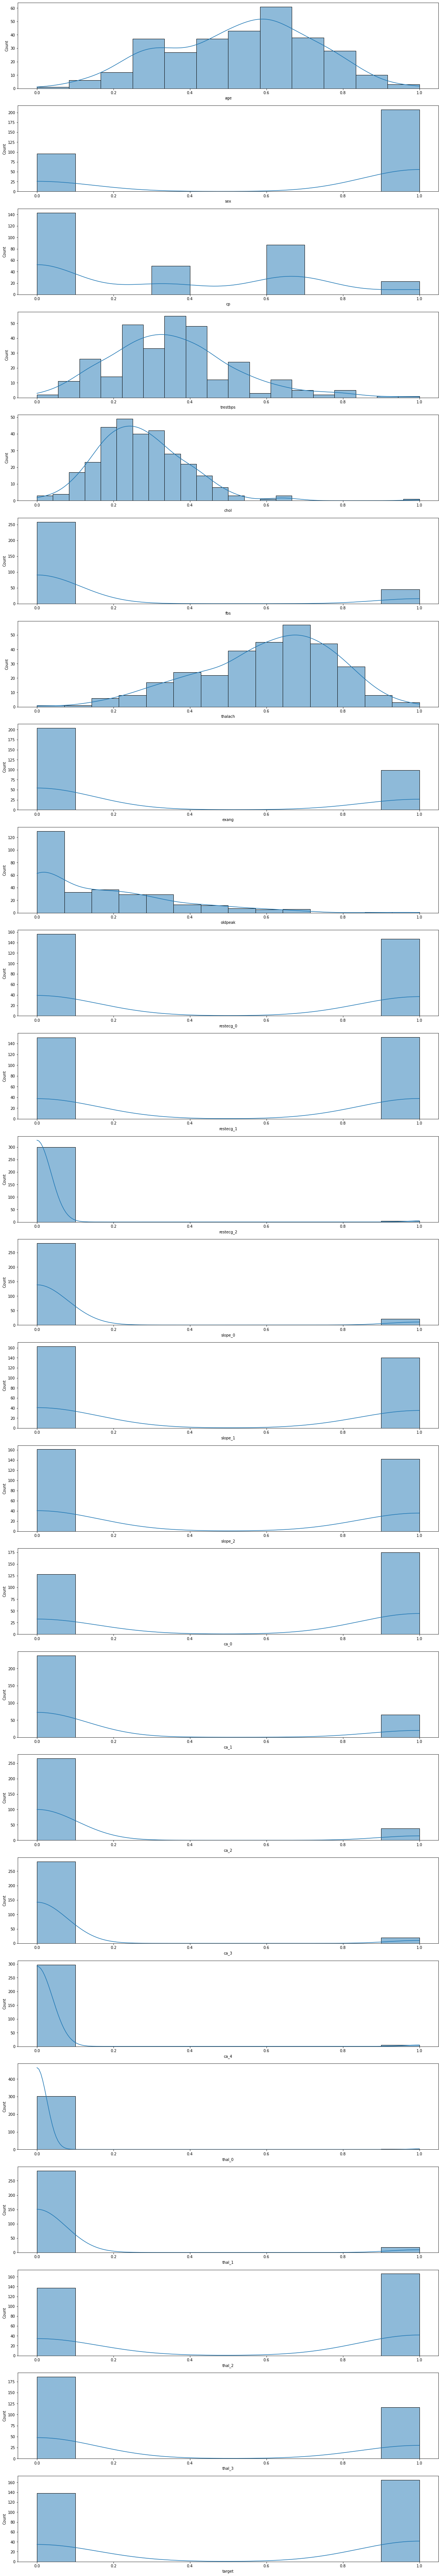

In [48]:
ShowColumnsDistribution(rk2_data)

<AxesSubplot:>

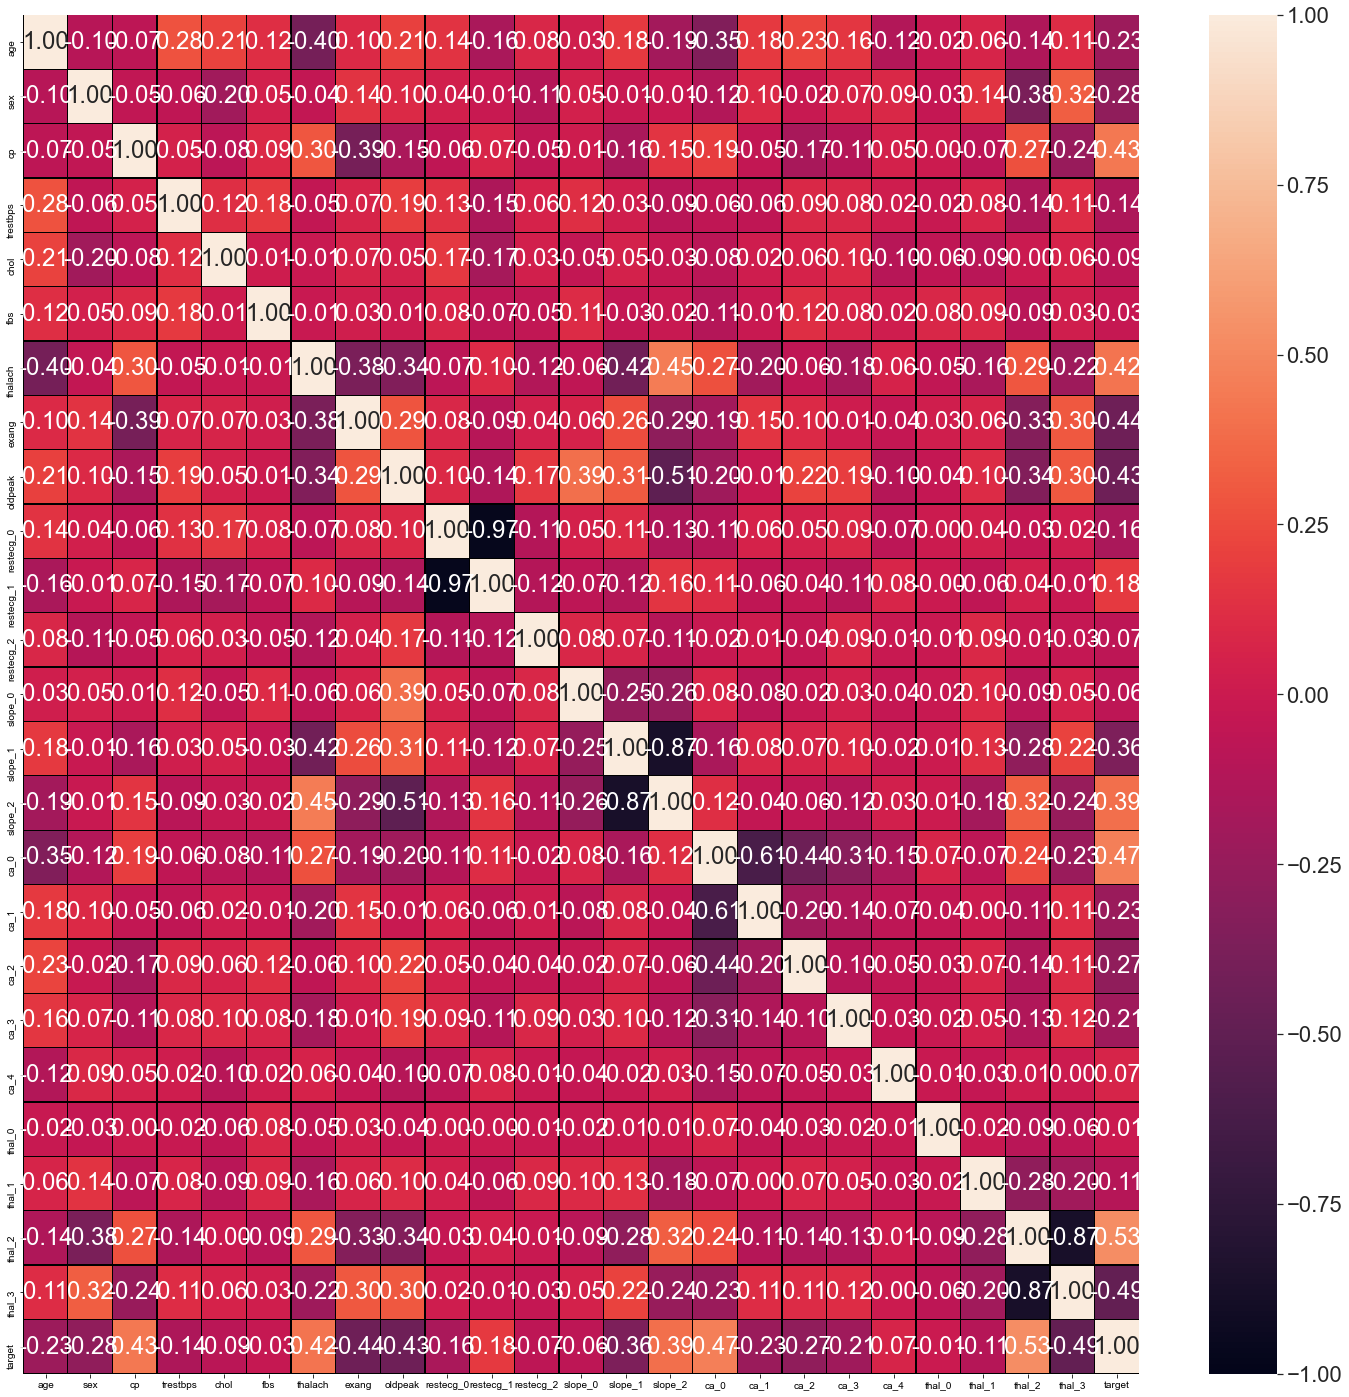

In [93]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.set(font_scale = 2)
sns.heatmap(rk2_data.corr(), ax=ax, annot=True, fmt=".2f", linewidths=0.3, linecolor="black", vmin = -1, vmax = 1)

В целом линейных зависимостей (в особенности с целевым признаком) крайне мало, поэтому с учётом количества колонок рассчитываем на недообучение модели из-за малого объёма данных.

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
rk2_x_train, rk2_x_test, rk2_y_train, rk2_y_test = train_test_split(rk2_data[columns[:-1]], rk2_data[columns[-1]], random_state = 6, train_size = 0.75)

### 2. Обучение дерева решений

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix

In [89]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 6)
tree.fit(rk2_x_train, rk2_y_train)
tree_prediction = tree.predict(rk2_x_test)

Будем смотреть на долю ошибок *False Positive* (**Precision**) и *False Negative* (**Recall**), а также на показатель **ROC AUC**

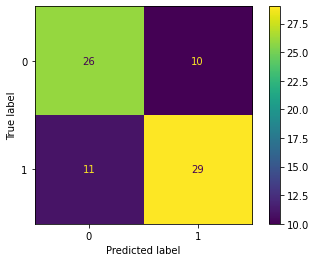

In [90]:
plot_confusion_matrix(tree, rk2_x_test, rk2_y_test)

In [76]:
precision_score(rk2_y_test, tree_prediction)

0.7435897435897436

In [75]:
recall_score(rk2_y_test, tree_prediction)

0.725

In [77]:
roc_auc_score(rk2_y_test, tree_prediction)

0.7236111111111111

Показатели в целом удовлетворительные, однако очевидным образом сказывается катастрофически малый объём набора данных.
### 3. Обучение модели градиентного бустинга

In [78]:
from catboost import CatBoostClassifier

In [79]:
cb = CatBoostClassifier(random_seed = 6)
cb.fit(rk2_x_train, rk2_y_train)
cb_prediction = tree.predict(rk2_x_test)

Learning rate set to 0.00547
0:	learn: 0.6888646	total: 155ms	remaining: 2m 34s
1:	learn: 0.6841253	total: 157ms	remaining: 1m 18s
2:	learn: 0.6794309	total: 160ms	remaining: 53.2s
3:	learn: 0.6744901	total: 163ms	remaining: 40.5s
4:	learn: 0.6708695	total: 165ms	remaining: 32.9s
5:	learn: 0.6657667	total: 168ms	remaining: 27.8s
6:	learn: 0.6614075	total: 180ms	remaining: 25.5s
7:	learn: 0.6572223	total: 183ms	remaining: 22.6s
8:	learn: 0.6525637	total: 194ms	remaining: 21.4s
9:	learn: 0.6487621	total: 210ms	remaining: 20.8s
10:	learn: 0.6451055	total: 212ms	remaining: 19.1s
11:	learn: 0.6402508	total: 215ms	remaining: 17.7s
12:	learn: 0.6376855	total: 216ms	remaining: 16.4s
13:	learn: 0.6328529	total: 219ms	remaining: 15.4s
14:	learn: 0.6298895	total: 221ms	remaining: 14.5s
15:	learn: 0.6254514	total: 224ms	remaining: 13.8s
16:	learn: 0.6211357	total: 238ms	remaining: 13.8s
17:	learn: 0.6172575	total: 240ms	remaining: 13.1s
18:	learn: 0.6146426	total: 243ms	remaining: 12.5s
19:	learn:

181:	learn: 0.3052798	total: 1.06s	remaining: 4.78s
182:	learn: 0.3048523	total: 1.06s	remaining: 4.75s
183:	learn: 0.3036143	total: 1.07s	remaining: 4.73s
184:	learn: 0.3026898	total: 1.08s	remaining: 4.75s
185:	learn: 0.3018467	total: 1.08s	remaining: 4.73s
186:	learn: 0.3008251	total: 1.08s	remaining: 4.71s
187:	learn: 0.3000593	total: 1.09s	remaining: 4.71s
188:	learn: 0.2989356	total: 1.11s	remaining: 4.75s
189:	learn: 0.2983302	total: 1.11s	remaining: 4.73s
190:	learn: 0.2976581	total: 1.12s	remaining: 4.75s
191:	learn: 0.2969675	total: 1.14s	remaining: 4.78s
192:	learn: 0.2962201	total: 1.15s	remaining: 4.82s
193:	learn: 0.2955009	total: 1.15s	remaining: 4.8s
194:	learn: 0.2945761	total: 1.16s	remaining: 4.78s
195:	learn: 0.2939642	total: 1.16s	remaining: 4.76s
196:	learn: 0.2929670	total: 1.16s	remaining: 4.74s
197:	learn: 0.2923799	total: 1.17s	remaining: 4.72s
198:	learn: 0.2918708	total: 1.17s	remaining: 4.7s
199:	learn: 0.2910667	total: 1.18s	remaining: 4.73s
200:	learn: 0.

354:	learn: 0.1994505	total: 1.94s	remaining: 3.52s
355:	learn: 0.1991507	total: 1.94s	remaining: 3.51s
356:	learn: 0.1987637	total: 1.94s	remaining: 3.5s
357:	learn: 0.1984542	total: 1.95s	remaining: 3.5s
358:	learn: 0.1980046	total: 1.95s	remaining: 3.49s
359:	learn: 0.1978061	total: 1.96s	remaining: 3.48s
360:	learn: 0.1973109	total: 1.96s	remaining: 3.47s
361:	learn: 0.1968702	total: 1.96s	remaining: 3.46s
362:	learn: 0.1965398	total: 1.97s	remaining: 3.45s
363:	learn: 0.1962352	total: 1.97s	remaining: 3.44s
364:	learn: 0.1960415	total: 1.97s	remaining: 3.43s
365:	learn: 0.1954809	total: 1.98s	remaining: 3.43s
366:	learn: 0.1950410	total: 2s	remaining: 3.44s
367:	learn: 0.1945756	total: 2.01s	remaining: 3.46s
368:	learn: 0.1940087	total: 2.01s	remaining: 3.44s
369:	learn: 0.1934202	total: 2.02s	remaining: 3.43s
370:	learn: 0.1929106	total: 2.02s	remaining: 3.42s
371:	learn: 0.1925121	total: 2.03s	remaining: 3.42s
372:	learn: 0.1922408	total: 2.04s	remaining: 3.43s
373:	learn: 0.191

524:	learn: 0.1501757	total: 2.83s	remaining: 2.56s
525:	learn: 0.1500005	total: 2.84s	remaining: 2.56s
526:	learn: 0.1497868	total: 2.84s	remaining: 2.55s
527:	learn: 0.1496170	total: 2.84s	remaining: 2.54s
528:	learn: 0.1492922	total: 2.84s	remaining: 2.53s
529:	learn: 0.1490430	total: 2.85s	remaining: 2.52s
530:	learn: 0.1488404	total: 2.85s	remaining: 2.52s
531:	learn: 0.1487527	total: 2.85s	remaining: 2.51s
532:	learn: 0.1484247	total: 2.86s	remaining: 2.51s
533:	learn: 0.1482827	total: 2.86s	remaining: 2.5s
534:	learn: 0.1479833	total: 2.87s	remaining: 2.49s
535:	learn: 0.1477147	total: 2.87s	remaining: 2.48s
536:	learn: 0.1475727	total: 2.88s	remaining: 2.48s
537:	learn: 0.1472707	total: 2.89s	remaining: 2.48s
538:	learn: 0.1469898	total: 2.91s	remaining: 2.49s
539:	learn: 0.1469012	total: 2.92s	remaining: 2.49s
540:	learn: 0.1466536	total: 2.93s	remaining: 2.48s
541:	learn: 0.1464412	total: 2.94s	remaining: 2.48s
542:	learn: 0.1461472	total: 2.94s	remaining: 2.48s
543:	learn: 0

697:	learn: 0.1163612	total: 3.72s	remaining: 1.61s
698:	learn: 0.1162196	total: 3.73s	remaining: 1.61s
699:	learn: 0.1160414	total: 3.74s	remaining: 1.6s
700:	learn: 0.1158486	total: 3.74s	remaining: 1.59s
701:	learn: 0.1158067	total: 3.74s	remaining: 1.59s
702:	learn: 0.1157243	total: 3.75s	remaining: 1.58s
703:	learn: 0.1155459	total: 3.75s	remaining: 1.58s
704:	learn: 0.1153505	total: 3.75s	remaining: 1.57s
705:	learn: 0.1152101	total: 3.76s	remaining: 1.57s
706:	learn: 0.1150762	total: 3.78s	remaining: 1.57s
707:	learn: 0.1149149	total: 3.79s	remaining: 1.56s
708:	learn: 0.1147579	total: 3.81s	remaining: 1.56s
709:	learn: 0.1146365	total: 3.81s	remaining: 1.56s
710:	learn: 0.1144544	total: 3.81s	remaining: 1.55s
711:	learn: 0.1143353	total: 3.83s	remaining: 1.55s
712:	learn: 0.1141579	total: 3.83s	remaining: 1.54s
713:	learn: 0.1140995	total: 3.83s	remaining: 1.53s
714:	learn: 0.1139940	total: 3.84s	remaining: 1.53s
715:	learn: 0.1137905	total: 3.84s	remaining: 1.52s
716:	learn: 0

877:	learn: 0.0921544	total: 4.83s	remaining: 671ms
878:	learn: 0.0919926	total: 4.83s	remaining: 665ms
879:	learn: 0.0919051	total: 4.83s	remaining: 659ms
880:	learn: 0.0917729	total: 4.83s	remaining: 653ms
881:	learn: 0.0916696	total: 4.83s	remaining: 647ms
882:	learn: 0.0915554	total: 4.84s	remaining: 641ms
883:	learn: 0.0915029	total: 4.84s	remaining: 635ms
884:	learn: 0.0913927	total: 4.86s	remaining: 631ms
885:	learn: 0.0912070	total: 4.86s	remaining: 625ms
886:	learn: 0.0911281	total: 4.86s	remaining: 619ms
887:	learn: 0.0909478	total: 4.86s	remaining: 613ms
888:	learn: 0.0908515	total: 4.86s	remaining: 607ms
889:	learn: 0.0908029	total: 4.87s	remaining: 601ms
890:	learn: 0.0907034	total: 4.87s	remaining: 596ms
891:	learn: 0.0905308	total: 4.9s	remaining: 593ms
892:	learn: 0.0904760	total: 4.91s	remaining: 589ms
893:	learn: 0.0904032	total: 4.93s	remaining: 584ms
894:	learn: 0.0902857	total: 4.95s	remaining: 580ms
895:	learn: 0.0901509	total: 4.96s	remaining: 576ms
896:	learn: 0

In [80]:
precision_score(rk2_y_test, cb_prediction)

0.7435897435897436

In [81]:
recall_score(rk2_y_test, cb_prediction)

0.725

In [82]:
roc_auc_score(rk2_y_test, cb_prediction)

0.7236111111111111

Видим, что градиентный бустинг не дал никакого прироста. Проблему считаем той же - малый объём данных. 